<a href="https://colab.research.google.com/github/aryan1113/Detecting-Depression-NLP/blob/main/Data%20processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Versions used : 

Library  | Version
-------------------|------------------
matplotlib | 3.6.2
pandas  | 1.3.5
seaborn | 0.11.2
nltk | 3.7

In [ ]:
pip install --upgrade matplotlib

In [1]:
import matplotlib
print(matplotlib.__version__)

3.6.2


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.chdir('MyDrive/Projects')
!ls

 final_cccf.csv  'Sentiment Analysis Dataset 2.csv'


In [ ]:
import nltk 
nltk.download('popular')
nltk.download('stopwords')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import string
file_path='Sentiment Analysis Dataset 2.csv'
df=pd.read_csv(file_path,on_bad_lines='skip')

In [81]:
3/1578612

1.9004036457343539e-06

In [27]:
print(df.shape)
df.head()

(1578612, 4)


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [28]:
#dropping unneccessary columns
df.drop(['SentimentSource','ItemID'],axis=1,inplace=True)
#Checking for null values (returns Boolean Value)
df.isnull().any()

Sentiment        False
SentimentText    False
dtype: bool

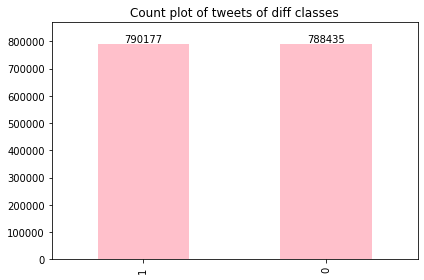

In [10]:
#We have nearly equal number of SentimentTexts that are of depressed and non-depressed nature
ax=df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))
ax.bar_label(ax.containers[-1])
# ax.bar_label('aaa','bbb')
ax.margins(y=0.1)
plt.title('Count plot of tweets of diff classes')
plt.tight_layout()
plt.show()

In [ ]:
#To remove spaces, may not be necessary
# df['SentimentText']=df['SentimentText'].str.replace(" ",'')

<h4>The word "amp" is seen in all wordclouds, this is an issue as amp is not a stopword and it's presence may end up feeding wrong information to the model. <br>
The amp-twitter component allows you to embed a Tweet or Moment.<br>
HTML encoding has not been converted to text, and ended up in text field, so we remove "amp" from all tweets. </h4>


In [33]:
#Remove all instances of amp
df['SentimentText'] = df['SentimentText'].str.replace('amp', '', case=False)

#Removing weird characters
df['SentimentText'] = df['SentimentText'].str.replace('®|©|¯|ª|¿|¾|¨|à|¸|£|ˆ|‡|•|‰|ž|«|”|¢|—|µ|¡|›|¥|‚|–|ð|Ÿ|™|á|º|·|ã|¹|»|±|³|€|¬|‹|¤|§|°|ì|š|í|†|ë|¦|„|¼|´|²|½|', '', case=False)

#Converting all tweets to lowercase
df['SentimentText']=df['SentimentText'].str.lower()

#Removing Punctuation
df['SentimentText']=df['SentimentText'].str.translate(str.maketrans('', '', string.punctuation))

#Removing URL's
df['SentimentText'] = df['SentimentText'].str.replace('http\S+|www.\S+', '', case=False)

      this weekend has sucked so far
      this weekend has sucked so far
      this weekend has sucked so far
      this weekend has sucked so far
      this weekend has sucked so far


In [35]:
#Adding length column in dataframe
df['length']=df["SentimentText"].str.len()

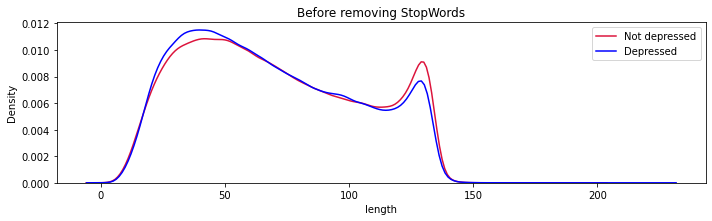

In [38]:
fig, ax = plt.subplots(figsize=(10, 3))
transparency=0.6
sns.kdeplot(df.loc[(df['Sentiment']==0), 
            'length'],
            color='crimson', label='Not depressed', ax=ax)

sns.kdeplot(df.loc[(df['Sentiment']==1), 
            'length'],
            color='blue', label='Depressed', ax=ax)
ax.legend()
plt.tight_layout()
plt.title('Before removing StopWords')
plt.show()

In [36]:
#Removing StopWords
stop_words = stopwords.words('english')
df['WithoutStopwords'] = df['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#takes around 1min to complete
df['len after']=df["WithoutStopwords"].str.len()

In [39]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Sentiment,length,len after
count,1578612.0,1578612.0,1578612.0
mean,0.5,69.5,49.0
std,0.5,34.3,24.5
min,0.0,1.0,0.0
25%,0.0,41.0,29.0
50%,1.0,65.0,46.0
75%,1.0,97.0,67.0
max,1.0,225.0,175.0


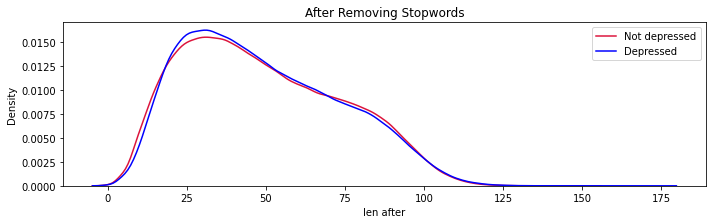

In [37]:
fig, ax = plt.subplots(figsize=(10, 3))
transparency=0.6
sns.kdeplot(df.loc[(df['Sentiment']==0), 
            'len after'],
            color='crimson', label='Not depressed', ax=ax)

sns.kdeplot(df.loc[(df['Sentiment']==1), 
            'len after'],
            color='blue', label='Depressed', ax=ax)
ax.legend()
plt.tight_layout()
plt.title('After Removing Stopwords')
plt.show()

<h3>Visualization with Word Clouds </h3>

In [70]:
df.drop(df[df.length<5].index , inplace=True)
df.drop(labels=[413173,101506,286100,615914],axis=0,inplace=True)

In [71]:
df[df['len after']>140]

,Sentiment,SentimentText,length,WithoutStopwords,len after
775525,1,got my quotstimulas checkquot shopping tomorro...,147,got quotstimulas checkquot shopping tomorrow q...,141
800553,0,harry potter dragged draco malfoy â s trousers...,196,harry potter dragged draco malfoy â trousers p...,151
1262015,1,we had some awesome times at school in between...,225,awesome times school classes settin things fir...,151


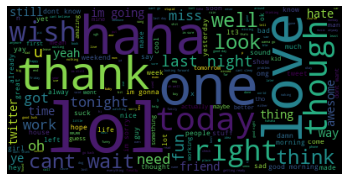

In [72]:
complete_wordcloud = WordCloud().generate(' '.join(df['WithoutStopwords']))
plt.imshow(complete_wordcloud)
plt.axis("off")
plt.show()

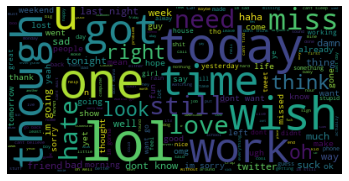

In [73]:
#With 0 sentiment
#Depressed tweets
words = ' '.join([Text for Text in df[df['Sentiment']==0]['WithoutStopwords']])
wordcloud1 = WordCloud().generate(words)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

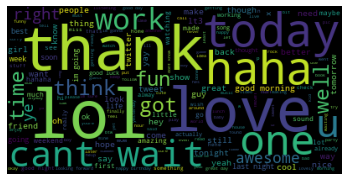

In [74]:
#With 1 sentiment
#Not Depressed tweets
dep_words = ' '.join([Text for Text in df[df['Sentiment']==1]['WithoutStopwords']])
wordcloud2 = WordCloud().generate(dep_words)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [65]:
#Grouping dataframe based on Sentiment, and getting max length of each class, using a lambda function
Grouped_senti = (df.groupby('Sentiment')['WithoutStopwords']
       .agg(lambda x: x.str.len().max())
       .reset_index(name='Max_length'))
Grouped_senti.head()

,Sentiment,Max_length
0,0,151
1,1,151


In [76]:
#Longest Tweet that is labelled "Not Depressed"
df.loc[(df['Sentiment']==1) & (df['len after']==Grouped_senti['Max_length'][1])]

,Sentiment,SentimentText,length,WithoutStopwords,len after
1262015,1,we had some awesome times at school in between...,225,awesome times school classes settin things fir...,151


In [77]:
#Longest Tweet that is labelled "Depressed"
df.loc[(df['Sentiment']==0) & (df['len after']==Grouped_senti['Max_length'][1])]

,Sentiment,SentimentText,length,WithoutStopwords,len after
800553,0,harry potter dragged draco malfoy â s trousers...,196,harry potter dragged draco malfoy â trousers p...,151


In [75]:
#To save dataset for further analysis
df.to_csv('Processed data.csv')